<a href="https://colab.research.google.com/github/maplerivertree/notes-9781787125933/blob/master/adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class AdalineGD(object):
  """Adaptive Linear Neuron classifier

  attributes:
  --------
  cost_ : list
    sum-of-squares cost function value in each epoch.

  """
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 821150):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() /2
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    return X
  
  def predict(self, X):
    return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

In [0]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header = None)
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

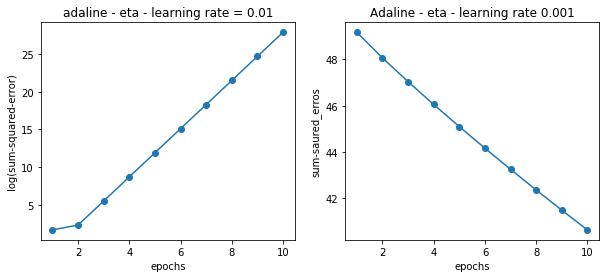

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) +1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('adaline - eta - learning rate = 0.01')

ada2= AdalineGD(n_iter=10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) +1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('sum-saured_erros')
ax[1].set_title('Adaline - eta - learning rate 0.001')
plt.show()


#when eta is too large, the errors go up as the algo keeps overshoot the global minimum
#small eta takes lots of epochs

In [0]:
""" standarization """
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() +1
  x2_min, x2_max = X[:,1].min() -1, X[:, 1].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array(np.array([xx1.ravel(), xx2.ravel()]).T))
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha= 0.8,
                c =colors[idx], 
                marker = markers[idx],
                label = cl, 
                edgecolor = 'black')

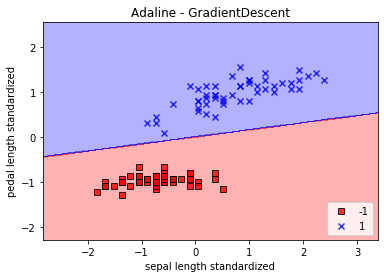

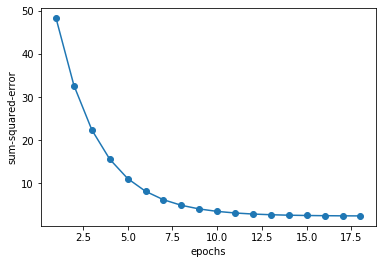

In [25]:
ada = AdalineGD(n_iter=18, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - GradientDescent')
plt.xlabel('sepal length standardized')
plt.ylabel('pedal length standardized')
plt.legend(loc = 'lower right')
plt.tight_layout
plt.show()
plt.plot(range(1, len(ada.cost_) +1), ada.cost_, marker='o')
plt.xlabel('epochs')
plt.ylabel('sum-squared-error')
plt.show()